In [123]:
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import jupyter
import pymssql
import plotly 
plotly.tools.set_credentials_file(username='perryraskin', api_key='2Qc3hhnv8Z4aEiUdajJ2')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import preprocessing
%matplotlib inline
pd.options.mode.chained_assignment = None
import glglive

In [130]:
glglive.say_hi()

hello


In [207]:
glg_data = glglive.pandas_the_data('./sql/Scheduling_Data_PSS.sql')

In [208]:
glg_data

Week     PSS_Member_Name          PSS_Member_Email  \
0   2017-01-29       Samantha Byrd         SByrd@glgroup.com   
1   2017-04-02     Ossian Olausson     oolausson@glgroup.com   
2   2017-04-02     Brianna Barcena      BBarcena@glgroup.com   
3   2017-02-19      Kristen Smaila       ksmaila@glgroup.com   
4   2017-03-26    Tahjai Conkerite    TConkerite@glgroup.com   
5   2017-04-23       Kacie Simpson     ksimpson2@glgroup.com   
6   2017-07-23      Heather Loflin       hloflin@glgroup.com   
7   2017-04-09       Patrick Rosen        PRosen@glgroup.com   
8   2017-05-21         Erin DeGeer       EDeGeer@glgroup.com   
9   2017-06-04       Mary Albright     MAlbright@glgroup.com   
10  2017-06-04    Tahjai Conkerite    TConkerite@glgroup.com   
11  2017-05-14        Lucy Redshaw      lredshaw@glgroup.com   
12  2017-06-04     Brianna Barcena      BBarcena@glgroup.com   
13  2017-06-18      Kristen Smaila       ksmaila@glgroup.com   
14  2017-06-11         Erin DeGeer       EDeGeer@glgroup.com   
15  2017-07-16      Nikitha Aithal       NAITHAL@glgroup.com   
16  2017-06-25     Ossian Olausson     oolausson@glgroup.com   
17  2017-07-23       Emily Colwell      ECOLWELL@glgroup.com   
18  2017-07-16       Emily Colwell      ECOLWELL@glgroup.com   
19  2017-07-23      Nikitha Aithal       NAITHAL@glgroup.com   
20  2017-07-02      Kyndal Hammock      KHammock@glgroup.com   
21  2017-07-30       Patrick Rosen        PRosen@glgroup.com   
22  2017-01-08         Lena Armuth       larmuth@glgroup.com   
23  2017-01-15         Lena Armuth       larmuth@glgroup.com   
24  2017-02-05       Kacie Simpson     ksimpson2@glgroup.com   
25  2017-02-26     Brianna Barcena      BBarcena@glgroup.com   
26  2017-04-16       Samantha Byrd         SByrd@glgroup.com   
27  2017-07-23         Erin DeGeer       EDeGeer@glgroup.com   
28  2017-07-16         Erin DeGeer       EDeGeer@glgroup.com   
29  2017-04-23      Kristen Smaila       ksmaila@glgroup.com   
..         ...                 ...                       ...   
470 2017-06-18         Alex Jordan       AJordan@glgroup.com   
471 2017-04-30       Kacie Simpson     ksimpson2@glgroup.com   
472 2017-06-11      Nikitha Aithal       NAITHAL@glgroup.com   
473 2017-07-09       Patrick Rosen        PRosen@glgroup.com   
474 2017-07-02     Brianna Barcena      BBarcena@glgroup.com   
475 2017-07-30      Kristen Smaila       ksmaila@glgroup.com   
476 2017-06-04          Demi Young        DYOUNG@glgroup.com   
477 2017-01-22       Emily Colwell      ECOLWELL@glgroup.com   
478 2017-01-29       Mary Albright     MAlbright@glgroup.com   
479 2017-02-26     Ossian Olausson     oolausson@glgroup.com   
480 2017-03-19       Shane Summers      SSummers@glgroup.com   
481 2017-05-28       Shane Summers      SSummers@glgroup.com   
482 2017-04-02      Nikitha Aithal       NAITHAL@glgroup.com   
483 2017-03-05      Kristen Smaila       ksmaila@glgroup.com   
484 2017-04-09         Erin DeGeer       EDeGeer@glgroup.com   
485 2017-05-07    Tahjai Conkerite    TConkerite@glgroup.com   
486 2017-03-12       Mary Albright     MAlbright@glgroup.com   
487 2017-05-14       Mary Albright     MAlbright@glgroup.com   
488 2017-04-23        Lucy Redshaw      lredshaw@glgroup.com   
489 2017-06-18       Jazma Johnson     jjohnson1@glgroup.com   
490 2017-04-02      Heather Loflin       hloflin@glgroup.com   
491 2017-06-04       Jazma Johnson     jjohnson1@glgroup.com   
492 2017-07-30       Lauren Jacobs       ljacobs@glgroup.com   
493 2017-07-02  Austin Rittenberry  ARittenberry@glgroup.com   
494 2017-07-30      Nikitha Aithal       NAITHAL@glgroup.com   
495 2017-05-07     Brianna Barcena      BBarcena@glgroup.com   
496 2017-05-21         Alex Jordan       AJordan@glgroup.com   
497 2017-05-28  Austin Rittenberry  ARittenberry@glgroup.com   
498 2017-06-25       Patrick Rosen        PRosen@glgroup.com   
499 2017-01-15       Samantha Byrd         SByrd@glgroup.com   

     Total_Requests_Recieved  Total_Sched

In [185]:
df = pd.DataFrame(glg_data)
#df.rename(columns={0: 'Name', 1: 'Continent', 2: 'Population', 3: 'LifeExpectancy', 4:'GNP'}, inplace=True);
#df = df.sort(['Total_Requests_Received'], ascending=[1]);

In [186]:
df.head()

Week  PSS_Member_Name       PSS_Member_Email  Total_Requests_Recieved  \
0 2017-07-16      Erin DeGeer    EDeGeer@glgroup.com                       30   
1 2017-07-23      Erin DeGeer    EDeGeer@glgroup.com                       35   
2 2017-03-19  Ossian Olausson  oolausson@glgroup.com                        0   
3 2017-07-09      Erin DeGeer    EDeGeer@glgroup.com                       14   
4 2017-03-12       Demi Young     DYOUNG@glgroup.com                        0   

   Total_Scheduled_Calls  Unique_Calls_Scheduled  \
0                    280                     230   
1                    247                     205   
2                    247                     206   
3                    237                     194   
4                    229                     187   

   Initial_Schedule_Avg_turnaround_In_Hours  \
0                                        37   
1                                        33   
2                                         0   
3                                        29   
4                                         0   

   Second_Schedule_Avg_Turmaround_In_Hours  \
0                                       66   
1                                       30   
2                                        0   
3                                       38   
4                                        0   

   Third_Schedule_Avg_Turmaround_In_Hours  
0                                       5  
1                                      16  
2                                       0  
3                                       0  
4                                       0

In [187]:
trace1 = Bar(
     x=df['Total_Scheduled_Calls'],
     y=df['Unique_Calls_Scheduled']
)
layout = Layout(
     title='Some GLG Data',
     xaxis=XAxis( title='Total Scheduled Calls' ),
     yaxis=YAxis( type='log', title='Unique Calls Scheduled' )
)
data = Data([trace1])
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='glg_data_1')

In [188]:

import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
     x=df['Total_Scheduled_Calls'],
     name = 'Total Calls',
     connectgaps=True
)
trace2 = go.Scatter(
     x=df['Unique_Calls_Scheduled'],
     name = 'Unique Calls',
     connectgaps=True
)
layout = Layout(
     title='More GLG Data',
     xaxis=XAxis( title='Total Scheduled Calls' )
)
data = [trace1, trace2]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='glg_connected_lines')

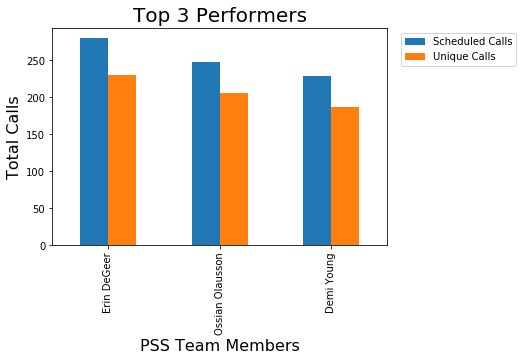

In [209]:
# sort df by descending Total Scheduled Calls
dfs = df.sort_values(['Total_Scheduled_Calls'], ascending=False)

# drop duplicate members after appearing once and reset index
dfd = dfs.drop_duplicates('PSS_Member_Name').reset_index()

# values from table
groups = [[dfd['Total_Scheduled_Calls'][0],dfd['Unique_Calls_Scheduled'][0]],
       [dfd['Total_Scheduled_Calls'][1],dfd['Unique_Calls_Scheduled'][1]],
       [dfd['Total_Scheduled_Calls'][2],dfd['Unique_Calls_Scheduled'][2]]]
group_labels = [dfd['PSS_Member_Name'][0], dfd['PSS_Member_Name'][1], dfd['PSS_Member_Name'][2]]
group_metrics = ["Scheduled Calls", "Unique Calls"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar().legend(bbox_to_anchor=(1.4, 1))
plt.title('Top 3 Performers', fontsize= 20)
plt.xlabel('PSS Team Members', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

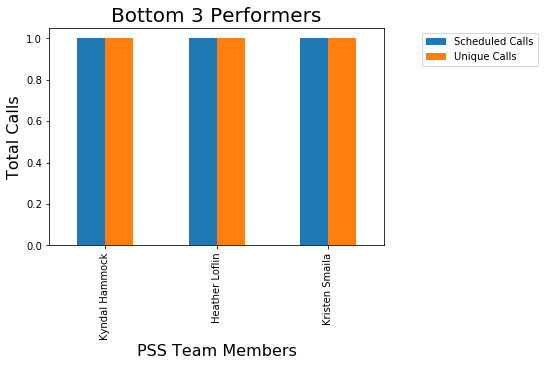

In [214]:
# sort df by ascending Total Scheduled Calls
dfsb = df.sort_values(['Total_Scheduled_Calls'], ascending=True)

# drop duplicate members after appearing once and reset index
dfdb = dfsb.drop_duplicates('PSS_Member_Name').reset_index()

# values from table
groups = [[dfdb['Total_Scheduled_Calls'][0],dfdb['Unique_Calls_Scheduled'][0]],
       [dfdb['Total_Scheduled_Calls'][1],dfdb['Unique_Calls_Scheduled'][1]],
       [dfdb['Total_Scheduled_Calls'][2],dfdb['Unique_Calls_Scheduled'][2]]]
group_labels = [dfdb['PSS_Member_Name'][0], dfdb['PSS_Member_Name'][1], dfdb['PSS_Member_Name'][2]]
group_metrics = ["Scheduled Calls", "Unique Calls"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar().legend(bbox_to_anchor=(1.1, 1))
plt.title('Bottom 3 Performers', fontsize= 20)
plt.xlabel('PSS Team Members', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

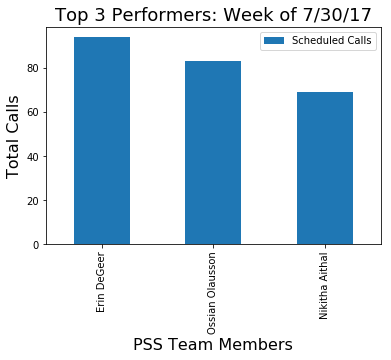

In [221]:
# sort df by descending Total Scheduled Calls
dfsw = df.sort_values(['Total_Scheduled_Calls'], ascending=False)

# only show data from this week
dftw = dfsw.loc[dfsw['Week'] == '2017-07-30']

# drop duplicate members after appearing once and reset index
dfdw = dftw.drop_duplicates('PSS_Member_Name').reset_index()

# values from table
groups = [[dfdw['Total_Scheduled_Calls'][0]],
       [dfdw['Total_Scheduled_Calls'][1]],
       [dfdw['Total_Scheduled_Calls'][2]]]

group_labels = [dfdw['PSS_Member_Name'][0], dfdw['PSS_Member_Name'][1], dfdw['PSS_Member_Name'][2]]
group_metrics = ["Scheduled Calls"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar().legend(bbox_to_anchor=(1, 1))
plt.title('Top 3 Performers: Week of 7/30/17', fontsize= 18)
plt.xlabel('PSS Team Members', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

In [222]:
dfdw

index       Week     PSS_Member_Name          PSS_Member_Email  \
0     218 2017-07-30         Erin DeGeer       EDeGeer@glgroup.com   
1     264 2017-07-30     Ossian Olausson     oolausson@glgroup.com   
2     320 2017-07-30      Nikitha Aithal       NAITHAL@glgroup.com   
3     331 2017-07-30       Shane Summers      SSummers@glgroup.com   
4     345 2017-07-30  Austin Rittenberry  ARittenberry@glgroup.com   
5     347 2017-07-30     Brianna Barcena      BBarcena@glgroup.com   
6     359 2017-07-30       Lauren Jacobs       ljacobs@glgroup.com   
7     369 2017-07-30       Samantha Byrd         SByrd@glgroup.com   
8     375 2017-07-30      Kristen Smaila       ksmaila@glgroup.com   
9     390 2017-07-30          Demi Young        DYOUNG@glgroup.com   
10    396 2017-07-30       Mary Albright     MAlbright@glgroup.com   
11    415 2017-07-30       Emily Colwell      ECOLWELL@glgroup.com   
12    421 2017-07-30         Alex Jordan       AJordan@glgroup.com   
13    428 2017-07-30    Tahjai Conkerite    TConkerite@glgroup.com   
14    434 2017-07-30       Patrick Rosen        PRosen@glgroup.com   
15    443 2017-07-30       Kacie Simpson     ksimpson2@glgroup.com   
16    471 2017-07-30       Jazma Johnson     jjohnson1@glgroup.com   
17    476 2017-07-30      Kyndal Hammock      KHammock@glgroup.com   

    Total_Requests_Recieved  Total_Scheduled_Calls  Unique_Calls_Scheduled  \
0                         0                     94                      85   
1                         0                     83                      76   
2                         1                     69                      63   
3                         0                     67                      63   
4                        10                     63                      53   
5                        13                     62                      50   
6                         9                     58                      51   
7                         1                     55                      52   
8                        84                     54                      45   
9                         0                     51                      42   
10                       13                     45                      38   
11                        1                     38                      34   
12                       20                     34                      32   
13                        0                     29                      28   
14                        0                     24                      23   
15                        6                     18                      15   
16                        0                      6                       6   
17                        0                      5                       5   

    Initial_Schedule_Avg_turnaround_In_Hours  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          6   
5                                          4   
6                                         21   
7                                          0   
8                                          3   
9                                          0   
10                                         1   
11                                         0   
12                                        10   
13                                         0   
14                                         0   
15                                        27   
16                                         0   
17                                         0   

    Second_Schedule_Avg_Turmaround_In_Hours  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         

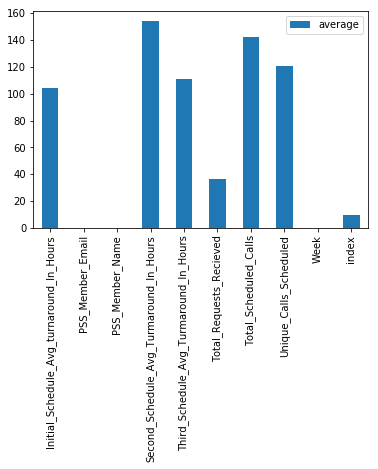

In [162]:
pd.concat(
    [dfst.mean().rename('average'), dfst.min().rename('min'), dfst.max().rename('max')],
    axis=1
).plot.bar()